In [13]:
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, ShuffleSplit
import xgboost as xgb
import matplotlib.pyplot as plt
# Import Local funcs
import sys
sys.path.append('../')
from utils.utils import *

In [2]:
X, y = get_training()
X = X.select_dtypes(exclude=['object'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
# Param Grid
param_grid = {
    'booster': ['gbtree'],  # Equivalent to 'boosting_type': ['gbdt']
    'objective': ['multi:softprob'],  # Equivalent to 'objective': ['multiclass']
    'eval_metric': ['mlogloss'],  # Equivalent to 'metric': ['multi_logloss']
    'num_class': [3],  # Number of classes for multi-class classification
    'eta': [0.3],  # Learning rate
    'max_depth': [3, 6, 9],  # Maximum depth of a tree
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 1.0],  # Subsample ratio of columns when constructing each tree
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight (hessian) needed in a child
    # 'gamma': [0, 0.5, 1],  # Minimum loss reduction required to make a further partition on a leaf node of the tree
    # 'lambda': [0, 1, 2],  # L2 regularization term on weights
    # 'alpha': [0, 0.1, 0.5],  # L1 regularization term on weights
}

shuffle_split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
model_xgb = xgb.XGBClassifier()
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=shuffle_split, n_jobs=-1, verbose=3)
grid_search.fit(X, y)

Fitting 1 folds for each of 81 candidates, totalling 81 fits


[CV 1/1] END booster=gbtree, colsample_bytree=0.8, eta=0.3, eval_metric=mlogloss, max_depth=3, min_child_weight=5, num_class=3, objective=multi:softprob, subsample=1.0;, score=0.640 total time=  47.2s
[CV 1/1] END booster=gbtree, colsample_bytree=0.8, eta=0.3, eval_metric=mlogloss, max_depth=3, min_child_weight=10, num_class=3, objective=multi:softprob, subsample=0.9;, score=0.639 total time=  47.3s
[CV 1/1] END booster=gbtree, colsample_bytree=0.8, eta=0.3, eval_metric=mlogloss, max_depth=3, min_child_weight=5, num_class=3, objective=multi:softprob, subsample=0.8;, score=0.635 total time=  47.3s
[CV 1/1] END booster=gbtree, colsample_bytree=0.8, eta=0.3, eval_metric=mlogloss, max_depth=3, min_child_weight=5, num_class=3, objective=multi:softprob, subsample=0.9;, score=0.638 total time=  47.5s
[CV 1/1] END booster=gbtree, colsample_bytree=0.8, eta=0.3, eval_metric=mlogloss, max_depth=3, min_child_weight=10, num_class=3, objective=multi:softprob, subsample=1.0;, score=0.635 total time= 

GridSearchCV(cv=ShuffleSplit(n_splits=1, random_state=42, test_size=0.2, train_size=None),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'booster': ['gbtree'],
                         'colsample_bytree': [0.8, 0.9, 1.0], 'eta': [0.3],
                         'eval_metric': ['mlogloss'], 'max_depth': [3, 6, 9],
                         'min_child_weight': [1, 5, 10], 'num_class': [3],
                         'objective': ['multi:softprob'],
                         'subsample': [0.8, 0.9, 1.0]},
             verbose=3)

In [11]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'booster': 'gbtree', 'colsample_bytree': 0.9, 'eta': 0.3, 'eval_metric': 'mlogloss', 'max_depth': 3, 'min_child_weight': 5, 'num_class': 3, 'objective': 'multi:softprob', 'subsample': 0.8}


In [9]:
# Initial Evaluation   
y_pred = grid_search.predict(X_test)
y_pred_proba = grid_search.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
print("Accuracy:", accuracy)
print("Log Loss:", logloss)

Accuracy: 0.6767708333333333
Log Loss: 0.7809620352814004


In [6]:
test_params = {'booster': 'gbtree', 'colsample_bytree': 0.9, 'eta': 0.3, 'eval_metric': 'mlogloss', 'max_depth': 3, 'min_child_weight': 5, 'num_class': 3, 'objective': 'multi:softprob', 'subsample': 0.8}
test_xgb = xgb.XGBClassifier(**test_params)
test_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.3, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=3, ...)

In [7]:
y_pred_proba = test_xgb.predict_proba(X_test)
logloss = log_loss(y_test, y_pred_proba)
print("Log Loss:", logloss)

Log Loss: 0.8605875637907957


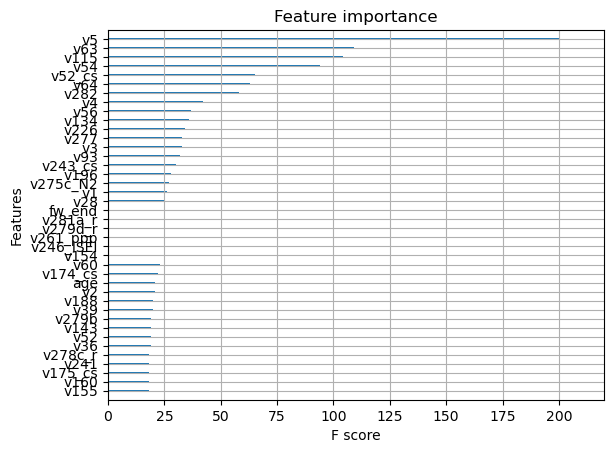

In [23]:
xgb.plot_importance(test_xgb, max_num_features=40, show_values=False)
#plt.figure(figsize = (30, 25))
plt.show()

# Save Model

In [10]:
import joblib
joblib.dump(grid_search, './model_bin/XGB_model_PFT.pkl')

['./model_bin/XGB_model_PFT.pkl']